<a href="https://colab.research.google.com/github/Edward1304/Signals-and-systems-Edward/blob/main/Exercices_SyS_(ES_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Edward Fabian Goyeneche Velandia.
##Juan Sebastian Torres Clavijo
## Juan Esteban Guevara Roncacio

**1.** Simular un proceso de discretización con  $F_s \geq 2 F_o.$.  Dibujar el resultado de la señal discretizada utilizando la función stem.

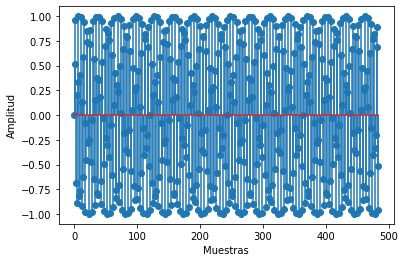

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros de la señal
freq = 100  # Hz
dur = 1  # s
Fs = 220  # Hz

# Generar señal sinusoidal
t = np.linspace(0, dur, int(dur*Fs), endpoint=False)
x = np.sin(2*np.pi*freq*t)

# Discretizar señal
xn = signal.resample(x, int(dur*Fs*Fs/freq))

# Dibujar señal discreta
plt.stem(xn, use_line_collection=True)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


2.Explicar el Funcionamiento  de  de los métodos **cdist** y **argmin**

**cdist** es una función del paquete scipy.spatial.distance que se utiliza para calcular la distancia entre cada par de vectores en dos matrices dadas. Esta función toma dos matrices como entrada y calcula la distancia entre cada par de vectores en las dos matrices utilizando la métrica de distancia especificada. La métrica de distancia puede ser Euclidiana, Manhattan, Chebyshev, entre otras.

Aquí hay un ejemplo de cómo usar cdist para calcular la distancia Euclidiana entre cada par de vectores en dos matrices:

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

# Definir dos matrices de vectores
X = np.array([[1, 2], [3, 4], [5, 6]])
Y = np.array([[2, 2], [4, 4]])

# Calcular la distancia Euclidiana entre cada par de vectores
dist = cdist(X, Y, 'euclidean')

print(dist)

En este ejemplo, X es una matriz de tres vectores de dos dimensiones, y Y es una matriz de dos vectores de dos dimensiones. La función cdist calcula la distancia Euclidiana entre cada par de vectores en X y Y, y devuelve una matriz de distancias de tamaño 3x2.

Por otro lado, argmin es una función de la biblioteca estándar de Python que se utiliza para encontrar el índice del valor mínimo en una matriz unidimensional. Si se llama a la función con una matriz multidimensional, se puede especificar un eje a lo largo del cual se debe encontrar el índice mínimo.

Aquí hay un ejemplo de cómo usar argmin para encontrar el índice del valor mínimo en una matriz unidimensional:


In [ ]:
import numpy as np

# Definir una matriz unidimensional
x = np.array([3, 2, 4, 1, 5])

# Encontrar el índice del valor mínimo en la matriz
min_index = np.argmin(x)

print(min_index)

En este ejemplo, x es una matriz unidimensional. La función argmin encuentra el índice del valor mínimo en la matriz x, que es 3. Si la matriz tuviera varias dimensiones, podríamos especificar el eje a lo largo del cual se debe encontrar el índice mínimo

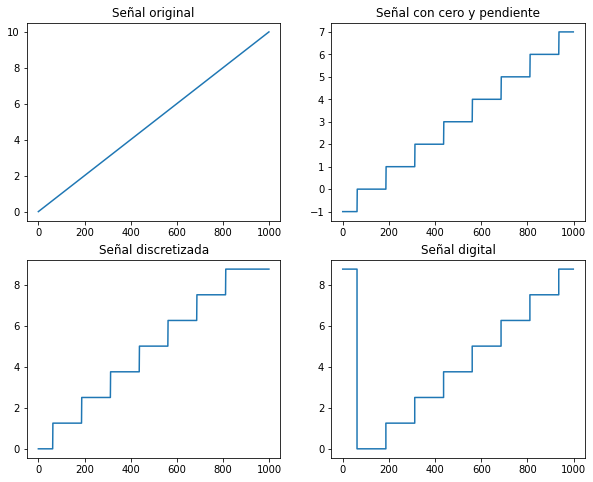

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def adc_3bits(signal, n_levels=8):
    # Definir los niveles de cuantización
    levels = np.linspace(0, 10, n_levels, endpoint=False)

    # Discretizar la señal con cero y pendiente
    d_signal = np.interp(signal, [0, 10], [-1, n_levels-1])
    d_signal = np.round(d_signal)

    # Cuantizar la señal
    q_signal = levels[d_signal.astype(int)]

    # Generar las gráficas
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Señal original
    axs[0, 0].plot(signal)
    axs[0, 0].set_title('Señal original')

    # Señal con cero y pendiente
    axs[0, 1].plot(d_signal)
    axs[0, 1].set_title('Señal con cero y pendiente')

    # Señal discretizada
    dists = cdist(signal.reshape(-1, 1), levels.reshape(-1, 1))
    indices = np.argmin(dists, axis=1)
    ds_signal = levels[indices]
    axs[1, 0].plot(ds_signal)
    axs[1, 0].set_title('Señal discretizada')

    # Señal digital
    axs[1, 1].step(np.arange(len(q_signal)), q_signal)
    axs[1, 1].set_title('Señal digital')

    plt.show()

    return q_signal

signal = np.linspace(0, 10, 1000)
q_signal = adc_3bits(signal)